# Markov and CLT comparison - Coin Toss Example

### Description:
Consider an example where we toss a fair coin 100 times. We are interested to find the probability of getting atleast 'h' number of heads. We can model this problem using Random Variables, where a tail is 0, head is 1 and Sn will be the sum of 'n' such tosses. We will plot the actual probabilities, bound from markov inequality and the Central limit theorem approximation of P(Sn>=h).

### Code

Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats

Random Variables, its distribution and expected values

In [2]:
X = [0,1] # Do not change these values considering how the problem is defined -- fixed --
f_X = [0.5,0.5] # Can be changed -- configurable -- 
n = 90  # Number of coin tosses -- configurable -- 

def expectation(random_variable,PMF):
    return np.sum(np.multiply(random_variable,PMF))
    
E_X = expectation(X,f_X)

def variance(random_variable,PMF,E_X):
    return np.sum(np.multiply((random_variable-E_X)**2,PMF))

var_X = variance(X,f_X,E_X)

# Sn = Sum of 'n' i.i.d. random variables of X
E_Sn = n*E_X
var_Sn = n*var_X

print "E[X] =", E_X, ", var[X] =", var_X
print "E[Sn] =", E_Sn, ", var[Sn] =", var_Sn

E[X] = 0.5 , var[X] = 0.25
E[Sn] = 45.0 , var[Sn] = 22.5


Functions

In [3]:
def fac(x): # returns the factorial of x
    prod = 1
    i = 1
    while (i<=x):
        prod = prod*i
        i = i+1
    return prod

def combi(n,r): # returns the nCr value
    return fac(n)*1.0 / (fac(n-r)*fac(r))

nCr_prob_list = []
for i in range(0,n+1):
    nCr_prob_list.append(combi(n,i)*math.pow(f_X[1],i)*math.pow(f_X[0],n-i))

def actual_prob(epsilon):
    su = 0
    for j in range(epsilon,n+1):
        su = su + nCr_prob_list[j]
    return su

def markov(epsilon):
    if(epsilon <= E_Sn): return 1 # limiting probability values to utmost of 1
    else: return E_Sn*1.0/epsilon

def clt(epsilon):
    return 1.0 - scipy.stats.norm.cdf((epsilon-E_Sn)/math.sqrt(1.0*var_Sn))

Initialization of lists

In [4]:
epsilon_list = [] # Values ranging from [0,n+1] which should give us P(Sn>=eps) from [1,0]
markov_list = [] # Markov bound array
actual_prob_list = [] # Actual probability of Sn >= x
clt_list = [] # Central limit theorem predicted values

Computations

In [5]:
for i in range(0,n+2):
    epsilon_list.append(i)
    actual_prob_list.append(actual_prob(i))
    markov_list.append(markov(i))
    clt_list.append(clt(i))

Plots

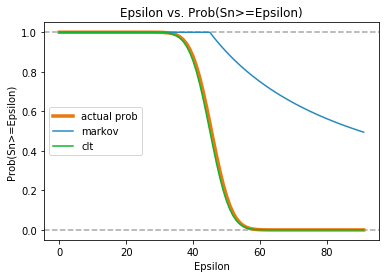

In [6]:
plt.axhline(y=0, color='#a8a8a7',linestyle='dashed')  
plt.axhline(y=1, color='#a8a8a7',linestyle='dashed')  

plt.plot(epsilon_list,actual_prob_list,color='#e67b10',linewidth=3.5,label='actual prob')
plt.plot(epsilon_list,markov_list,color='#268abd',label='markov')
plt.plot(epsilon_list,clt_list,color='#10b52e',label='clt')

plt.title("Epsilon vs. Prob(Sn>=Epsilon)")
plt.xlabel("Epsilon")
plt.ylabel("Prob(Sn>=Epsilon)")
plt.legend()

plt.show()

Conclusion

From the plot we can see that the Markov bound is indeed an upper bound on the actual probability. It does not seem that tight though. But given just the expected value and no more information about the Random Variable (non-negative) it does a decent job at giving us an upper bound. 

On the other hand, Central Limit theorem seems to give us a very close approximation of the actual probabilites. Remember, that for CLT we need both the expected value and variance. Here, its plotted based on the actual parameters since we know the distribution. But in reality, more often than not, we will only have access to the sample mean and variance. Nevertheless, the sample values are quite close to the actual values as number of samples are large. Overall, CLT is a good approximation and very useful.